In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
def myderiv(x,y):
    return y

In [3]:
def euler(initialx, initialy, stepsize, derivFn):
    x = initialx
    y = initialy
    while True:
        #print(y)
        yield y
        x += stepsize
        y = y + stepsize * derivFn(x,y)
        
        

In [4]:
def heun(initialx, initialy, stepsize, derivFn):
    x = initialx
    y = initialy
    while True:
        yield y
        x += stepsize
        yest = y + stepsize * derivFn(x,y)
        y = y + stepsize * (derivFn(x,y) + derivFn(x+stepsize, yest))/2
        
        
        

In [5]:
numsteps = 50
limit = 5
stepsize = limit/numsteps
print ("stepsize = ",stepsize)
x = np.linspace(0,limit,numsteps)
y1 = np.exp(x)
y2 = np.fromiter(euler(0, 1, stepsize, myderiv), float, len(x))
y3 = np.fromiter(heun(0, 1, stepsize, myderiv), float, len(x))

stepsize =  0.1


In [6]:
# Result is in y4.y[0]
y4 = solve_ivp(myderiv, (0, limit), (1,), t_eval = x, vectorized=True)

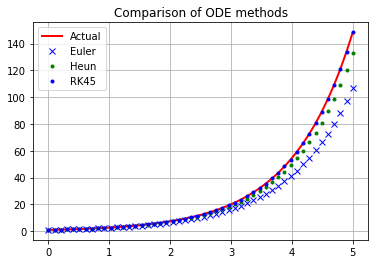

In [7]:
plt.plot(x,y1,'r-',linewidth=2, label='Actual')
plt.plot(x,y2,'bx',linewidth=2, label='Euler')
plt.plot(x,y3,'g.',linewidth=2, label='Heun')
plt.plot(x,y4.y[0],'b.',linewidth=2, label='RK45')

plt.grid()
plt.title("Comparison of ODE methods")
plt.legend()
plt.show()

In [8]:
y2err = abs(y2-y1)
y3err = abs(y3-y1)
y4err = abs(y4.y[0]-y1)

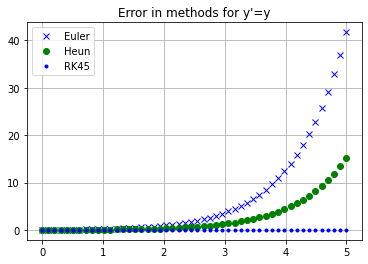

In [9]:
plt.plot(x,y2err,'bx',linewidth=2, label='Euler')
plt.plot(x,y3err,'go',linewidth=2, label='Heun')
plt.plot(x,y4err,'b.',linewidth=2, label='RK45')

plt.grid()
plt.title("Error in methods for y'=y")
plt.legend()
plt.show()